In [22]:
import numpy as np

# Code Chap 2

[75.05642756]
MSE: 305.7719958301902
Accuracy: 0.9253717934621964


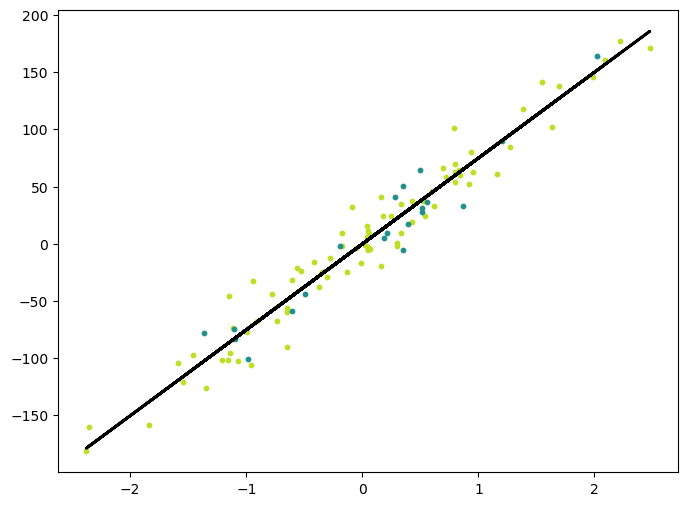

In [23]:
def r2_score(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0, 1]
    return corr ** 2


class LinearRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated


# Testing
if __name__ == "__main__":
    # Imports
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    def mean_squared_error(y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    X, y = datasets.make_regression(
        n_samples=100, n_features=1, noise=20, random_state=4
    )

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1234
    )

    regressor = LinearRegression(learning_rate=0.01, n_iters=1000)
    regressor.fit(X_train, y_train)
    predictions = regressor.predict(X_test)
    print(regressor.weights)
    mse = mean_squared_error(y_test, predictions)
    print("MSE:", mse)

    accu = r2_score(y_test, predictions)
    print("Accuracy:", accu)

    y_pred_line = regressor.predict(X)
    cmap = plt.get_cmap("viridis")
    fig = plt.figure(figsize=(8, 6))
    m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
    m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
    plt.plot(X, y_pred_line, color="black", linewidth=2, label="Prediction")
    plt.show()

# Code A

In [24]:
X = np.random.randint(100, 500, 50)
X = np.reshape(X, (50,1))

y = np.random.randint(1000,5000, 50)

NaN or infinite values encountered. Adjusting the learning rate.
NaN or infinite values encountered. Adjusting the learning rate.
NaN or infinite values encountered. Adjusting the learning rate.
Predicted house prices for x_pred:
X = 50.0: Predicted Price = 439.9512209592328
X = 200.0: Predicted Price = 1753.1805451389203
X = 300.0: Predicted Price = 2628.6667612587116
MSE: 1690341.7279880657
Accuracy: 0.07307531828853772


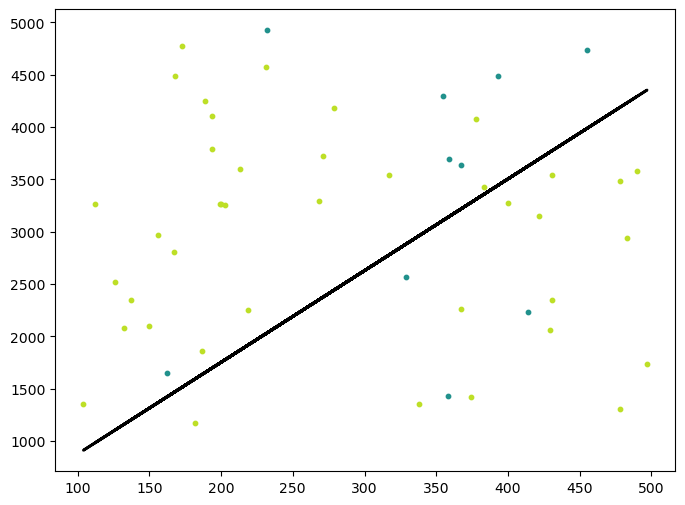

In [25]:
def r2_score(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0, 1]
    return corr ** 2


class LinearRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # Check for NaN or infinite values
            if np.isnan(self.weights).any() or np.isnan(self.bias) or not np.isfinite(self.weights).all() or not np.isfinite(self.bias):
                print("NaN or infinite values encountered. Adjusting the learning rate.")
                self.lr *= 0.1  # Reduce the learning rate
                self.weights = np.zeros(n_features)
                self.bias = 0
                continue

    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated


# Testing
if __name__ == "__main__":
    # Imports
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split

    def mean_squared_error(y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1234
    )

    # Define the input values for prediction
    x_pred = np.array([[50.0], [200.0], [300.0]])

    regressor = LinearRegression(learning_rate=0.01, n_iters=1000)
    regressor.fit(X_train, y_train)
    
    # Predict house prices for x_pred
    y_pred = regressor.predict(x_pred)
    print("Predicted house prices for x_pred:")
    for i in range(len(x_pred)):
        print(f"X = {x_pred[i][0]}: Predicted Price = {y_pred[i]}")

    # Display other metrics if needed (MSE, R^2 score, etc.)
    predictions = regressor.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    accu = r2_score(y_test, predictions)

    print("MSE:", mse)
    print("Accuracy:", accu)

    # Visualization if needed
    y_pred_line = regressor.predict(X)
    cmap = plt.get_cmap("viridis")
    fig = plt.figure(figsize=(8, 6))
    m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
    m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
    plt.plot(X, y_pred_line, color="black", linewidth=2, label="Prediction")
    plt.show()

# Code B

In [26]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
   